In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
plt.style.use('default')
import seaborn as sns
import matplotlib.pylab as pyl

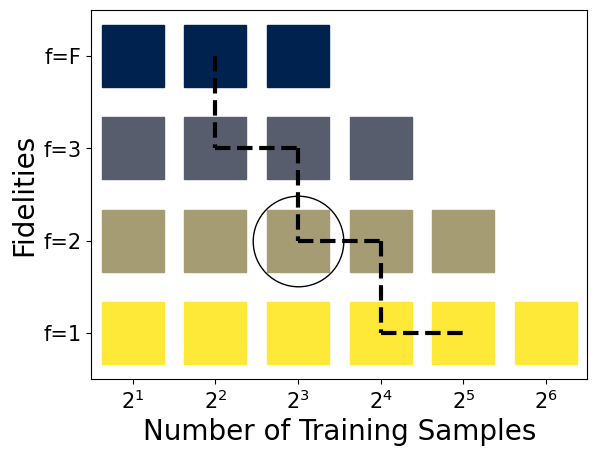

In [2]:
def generic_subspace():
    m=45
    plt.tight_layout()
    ns = ['$2^1$','$2^2$','$2^3$',
          '$2^4$','$2^5$','$2^6$',
          '$2^7$','$2^8$','$2^9$',
          '$2^{10}$','$2^{11}$','$2^{12}$',
          '$2^{13}$']
    import matplotlib.pylab as pyl
    colors = pyl.cm.cividis(np.linspace(0,1,4))[::-1]
    plt.plot(ns[:6],np.full(6,'f=1'),marker='s',linestyle='',markersize=m,color=colors[0])#'darkgreen'
    plt.plot(ns[:5],np.full(5,'f=2'),marker='s',linestyle='',markersize=m,color=colors[1])#'purple'
    plt.plot(ns[:4],np.full(4,'f=3'),marker='s',linestyle='',markersize=m,color=colors[2])#'tab:red'
    plt.plot(ns[:3],np.full(3,'f=F'),marker='s',linestyle='',markersize=m,color=colors[3])#'tab:blue'
    #plt.plot([1,2,3,4],[0,0,0,0],marker='s',linestyle='',markersize=20)
    plt.ylim(-0.5,3.5)
    plt.xlim(-0.5,5.5)
    plt.ylabel('Fidelities',fontsize=20)
    plt.xlabel('Number of Training Samples',fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    
    plt.plot([ns[1],ns[1]],['f=F','f=3'],linestyle='--',color='k',linewidth=3)
    plt.plot([ns[2],ns[2]],['f=3','f=2'],linestyle='--',color='k',linewidth=3)
    plt.plot([ns[3],ns[3]],['f=2','f=1'],linestyle='--',color='k',linewidth=3)
    
    plt.plot([ns[1],ns[2]],['f=3','f=3'],linestyle='--',color='k',linewidth=3)
    plt.plot([ns[2],ns[3]],['f=2','f=2'],linestyle='--',color='k',linewidth=3)
    plt.plot([ns[3],ns[4]],['f=1','f=1'],linestyle='--',color='k',linewidth=3)
    
    plt.plot(ns[2],['f=2'],marker='o',markerfacecolor='none',markersize=m*np.sqrt(2.1),color='black')
generic_subspace()

# LOAD DATA

In [5]:
train_data = np.load('Data/energies/y_trains_0.npy',allow_pickle=True)

In [6]:
defmae = np.zeros((5),dtype=object)
OLSmae = np.zeros((5),dtype=object)

for i in range(5):
    defmae[i] = np.load(f'Data/outputs/def_{str(i)}.npy')
    OLSmae[i] = np.load(f'Data/outputs/OLS_{str(i)}.npy')

sfKRR = np.load('Data/outputs/MP_and_CCSD_SLATMlaplacian_kernel_sig400.0_lam1e-1007072023_1007.npz',allow_pickle=True)['MAE'][0]

In [7]:
valens = np.loadtxt('Evaluation/eval_CCSD-ccpvdz.dat')[0:-700,1]
true_test = np.loadtxt('Evaluation/eval_CCSD-ccpvdz.dat')[367:,1]
defpreds = np.load('Data/outputs/preds_default.npy')
olspreds = np.load('Data/outputs/preds_OLS.npy')
valens.shape,true_test.shape, olspreds.shape, defpreds.shape

((367,), (700,), (700,), (700,))

In [8]:
XX = np.load('Data/GlobalSLATMTrain.npy')
norm =np.linalg.norm(XX,axis=1)

# PLOTS

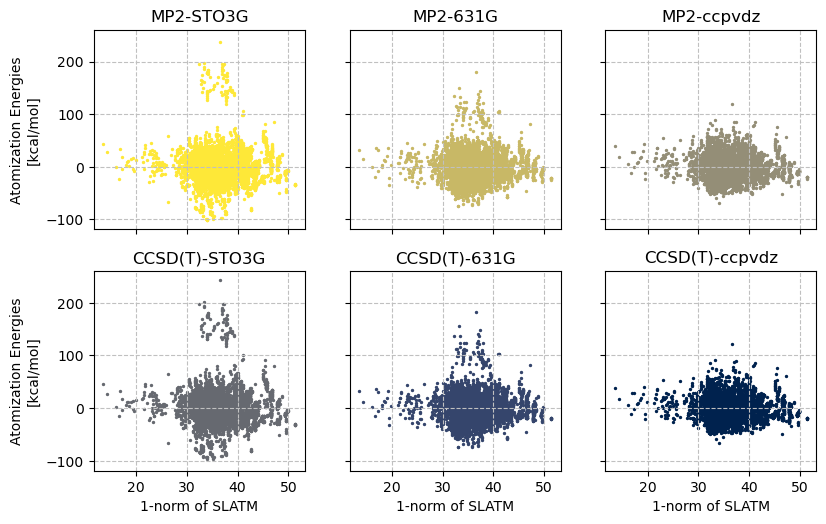

In [10]:
def SLATM_en_scatter():
    
    fig,ax = plt.subplots(2,3,figsize=(8,5),sharey=True, sharex=True)
    plt.tight_layout(w_pad = 1, h_pad = 2)
    ax = ax.flatten('C') 
    
    titles = np.asarray(['MP2-STO3G','MP2-631G','MP2-ccpvdz',
                         'CCSD(T)-STO3G','CCSD(T)-631G','CCSD(T)-ccpvdz'])
    colors = pyl.cm.cividis(np.linspace(0,1,6))[::-1]
    #colors=np.asarray(['k','tab:blue','tab:red','purple','darkgreen','orange'])[::-1]
    
    for i in range(6):
        
        ax[i].grid(True, which="major", ls="--",color='silver')
        ax[i].scatter(norm,train_data[i],marker='o',s=2,color=colors[i])
        ax[i].set_title(titles[i])
        if i>2:
            ax[i].set_xlabel('1-norm of SLATM')
        if i in [0,3]:
            ax[i].set_ylabel('Atomization Energies\n[kcal/mol]')

SLATM_en_scatter()

## LEARNING CURVES

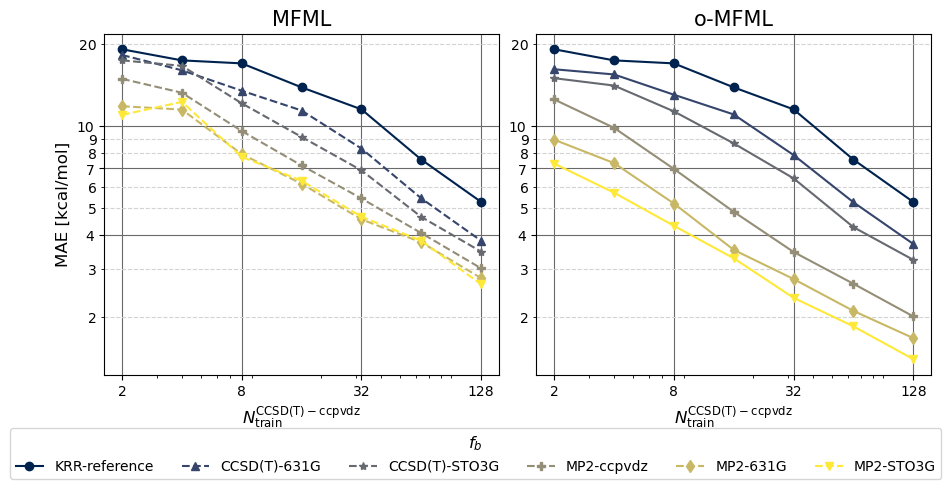

In [12]:
def LCs():
    fig,ax = plt.subplots(1,2,sharey=True, figsize=(9,4))
    #fig.suptitle('MFML Learning Curves\nSLATM; QM7b Dataset')
    plt.tight_layout(h_pad=2)
    labels = np.asarray(['MP2-STO3G','MP2-631G','MP2-ccpvdz',
                             'CCSD(T)-STO3G','CCSD(T)-631G','KRR-reference'])
    markers = ['^','*','P','d','v']
    colors = pyl.cm.cividis(np.linspace(0,1,6))
    #colors=np.asarray(['tab:blue','tab:red','purple','darkgreen','orange'])
    n= 2**np.arange(1,8)

    y_minor = mticker.LogLocator(base = 10, subs = np.arange(1.0,20,3), numticks = 20)
    y_major = mticker.LogLocator(base = 10, subs = np.arange(1.0,10,3), numticks = 10)

    ax[0].set_title('MFML',fontsize=15)
    ax[0].loglog(n,sfKRR,marker='o',label='Conventional KRR',color=colors[0])
    for i in range(5):
        ax[0].loglog(n,defmae[4-i],marker=markers[i],color=colors[i+1],label=f'$f_b$:{labels[4-i]}',linestyle='--')
    #ax[0].legend()
    ax[0].set_ylabel('MAE [kcal/mol]',fontsize=12)
    ax[0].set_xlabel('$N_{\mathrm{train}}^{\mathrm{CCSD(T)-ccpvdz}}$',fontsize=12)

    ax[1].set_title('o-MFML',fontsize=15)
    ax[1].loglog(n,sfKRR,marker='o',label='Conventional KRR',color=colors[0])
    for i in range(5):
        ax[1].loglog(n,OLSmae[4-i],marker=markers[i],color=colors[i+1],label=f'$f_b$:{labels[4-i]}')
    ax[1].set_xlabel('$N_{\mathrm{train}}^{\mathrm{CCSD(T)-ccpvdz}}$',fontsize=12)

    for i in range(2):
        #ax[i].legend(fontsize=11,framealpha=1.0)
        ax[i].xaxis.set_major_formatter(mticker.ScalarFormatter())
        ax[i].set_xticks([2,8,32,128])
        ax[i].yaxis.set_minor_formatter(mticker.ScalarFormatter())
        ax[i].yaxis.set_major_formatter(mticker.ScalarFormatter())
        #x[i].yaxis.set_minor_locator(y_minor)
        ax[i].yaxis.set_major_locator(y_major)
        ax[i].grid(True, which="major", ls="-",color='dimgray')
        ax[i].grid(True, axis='y', which="minor", ls="--",color='lightgray')
        #ax[i].set_xlabel('$N_{\mathrm{train}}^{\mathrm{TZVP}}$',fontsize=12)
        ax[i].yaxis.set_tick_params(labelleft=True,which='both')

    fig.legend(labels[::-1],ncol=6,bbox_to_anchor=(0.99,-0.02),title='$f_b$',title_fontsize=12,fontsize=10)

LCs()

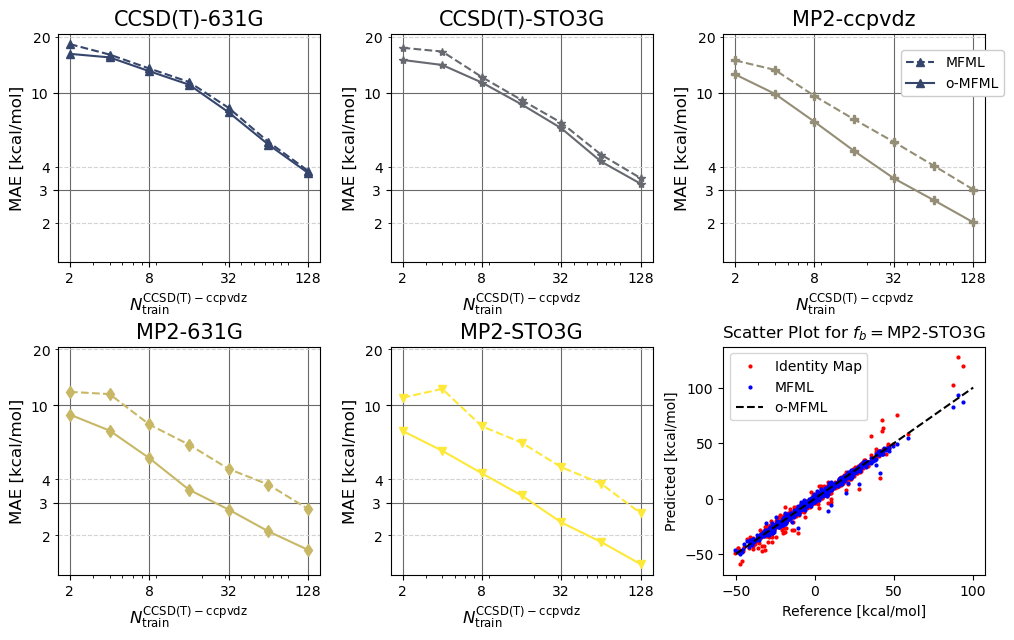

In [14]:
def individual_LC():
    fig,ax = plt.subplots(2,3,figsize=(10,6))
    plt.tight_layout(h_pad=4,w_pad=2)
    ax = ax.flatten('C')
    labels = np.asarray(['MP2-STO3G','MP2-631G','MP2-ccpvdz',
                         'CCSD(T)-STO3G','CCSD(T)-631G','CCSD(T)-ccpvdz'])
    markers = ['^','*','P','d','v']
    colors = pyl.cm.cividis(np.linspace(0,1,6))
    #colors=np.asarray(['tab:blue','tab:red','purple','darkgreen','orange'])
    n= 2**np.arange(1,8)

    y_minor = mticker.LogLocator(base = 10, subs = np.arange(1.0,5,1), numticks = 10)
    y_major = mticker.LogLocator(base = 10, subs = np.arange(1.0,5,2), numticks = 6)
    
    ax[-1].set_title('Scatter Plot for $f_b=$MP2-STO3G')
    ax[-1].scatter(true_test,defpreds,marker='o',color='red',s=4)
    ax[-1].scatter(true_test,olspreds,marker='o',color='blue',s=4)
    ax[-1].plot([-50,100],[-50,100],color='k',linestyle='--')
    ax[-1].set_ylabel('Predicted [kcal/mol]')
    ax[-1].set_xlabel('Reference [kcal/mol]')
    
    
    for i in range(5):
        ax[i].sharey(ax[0])
        ax[i].loglog(n,defmae[4-i],marker=markers[i],color=colors[i+1],linestyle='--')
        ax[i].loglog(n,OLSmae[4-i],marker=markers[i],color=colors[i+1])
        ax[i].set_title(labels[4-i],fontsize=15)
        ax[i].set_xlabel('$N_{\mathrm{train}}^{\mathrm{CCSD(T)-ccpvdz}}$',fontsize=12)
        ax[i].xaxis.set_major_formatter(mticker.ScalarFormatter())
        ax[i].set_xticks([2,8,32,128])
        ax[i].yaxis.set_minor_formatter(mticker.ScalarFormatter())
        ax[i].yaxis.set_major_formatter(mticker.ScalarFormatter())
        ax[i].yaxis.set_major_locator(y_major)
        ax[i].yaxis.set_minor_locator(y_minor)
        ax[i].grid(True, which="major", ls="-",color='dimgray')
        ax[i].grid(True, axis='y', which="minor", ls="--",color='lightgray')
        ax[i].set_ylabel('MAE [kcal/mol]',fontsize=12)
        ax[i].yaxis.set_tick_params(labelleft=True,which='both')
        
        
    fig.legend(['MFML','o-MFML'],ncol=1,bbox_to_anchor=(1,0.95),framealpha=1.0)
    
    ax[-1].legend(['Identity Map','MFML',
                   'o-MFML'],ncol=1)

individual_LC()

## COEFF ANALYSIS

In [15]:
def coeff_plotter(coeff_data,labels,uppertextcol=None, lowertextcol=None, ax=None,rounding=2):
    
    ax = ax or plt.gca()
    n_models = coeff_data.shape[0]
    nfids = labels.shape[0]
    colors = pyl.cm.cividis(np.linspace(0,1,11))
    

    count1 = 0
    for i in range(nfids-1,-1,-1):
        
        ax.plot([i+1+6],[labels[count1]],marker='s',color=colors[nfids-1+i],markersize=40,linestyle='')
        if i>0:
            
            ax.plot([i+6],[labels[count1]],marker='s',color=colors[i],markersize=40,linestyle='')
        count1 += 1
    
    ##adding coeffs
    if uppertextcol==None:
        uppertextcol = np.full(nfids,'k')
    if lowertextcol==None:
        lowertextcol = np.full(nfids-1,'w')
        
    for i in range(nfids):
        ax.text(x=7+n_models-nfids-i-0.2,y=labels[i],s=str(np.round(coeff_data[i],rounding)),fontsize=12,color=uppertextcol[i],weight='bold')
        try:
            ax.text(x=7+n_models-nfids-i-1-0.38,y=labels[i],s=str(np.round(coeff_data[nfids+i],rounding)),fontsize=12,color=lowertextcol[i],weight='bold')
        except:
            pass    
        
    ax.set_xlim(0.5+6,nfids+0.5+6)
    ax.set_ylim(-0.5,nfids-0.5)
    
    ax.grid(True, which="major", ls="--",color='silver')

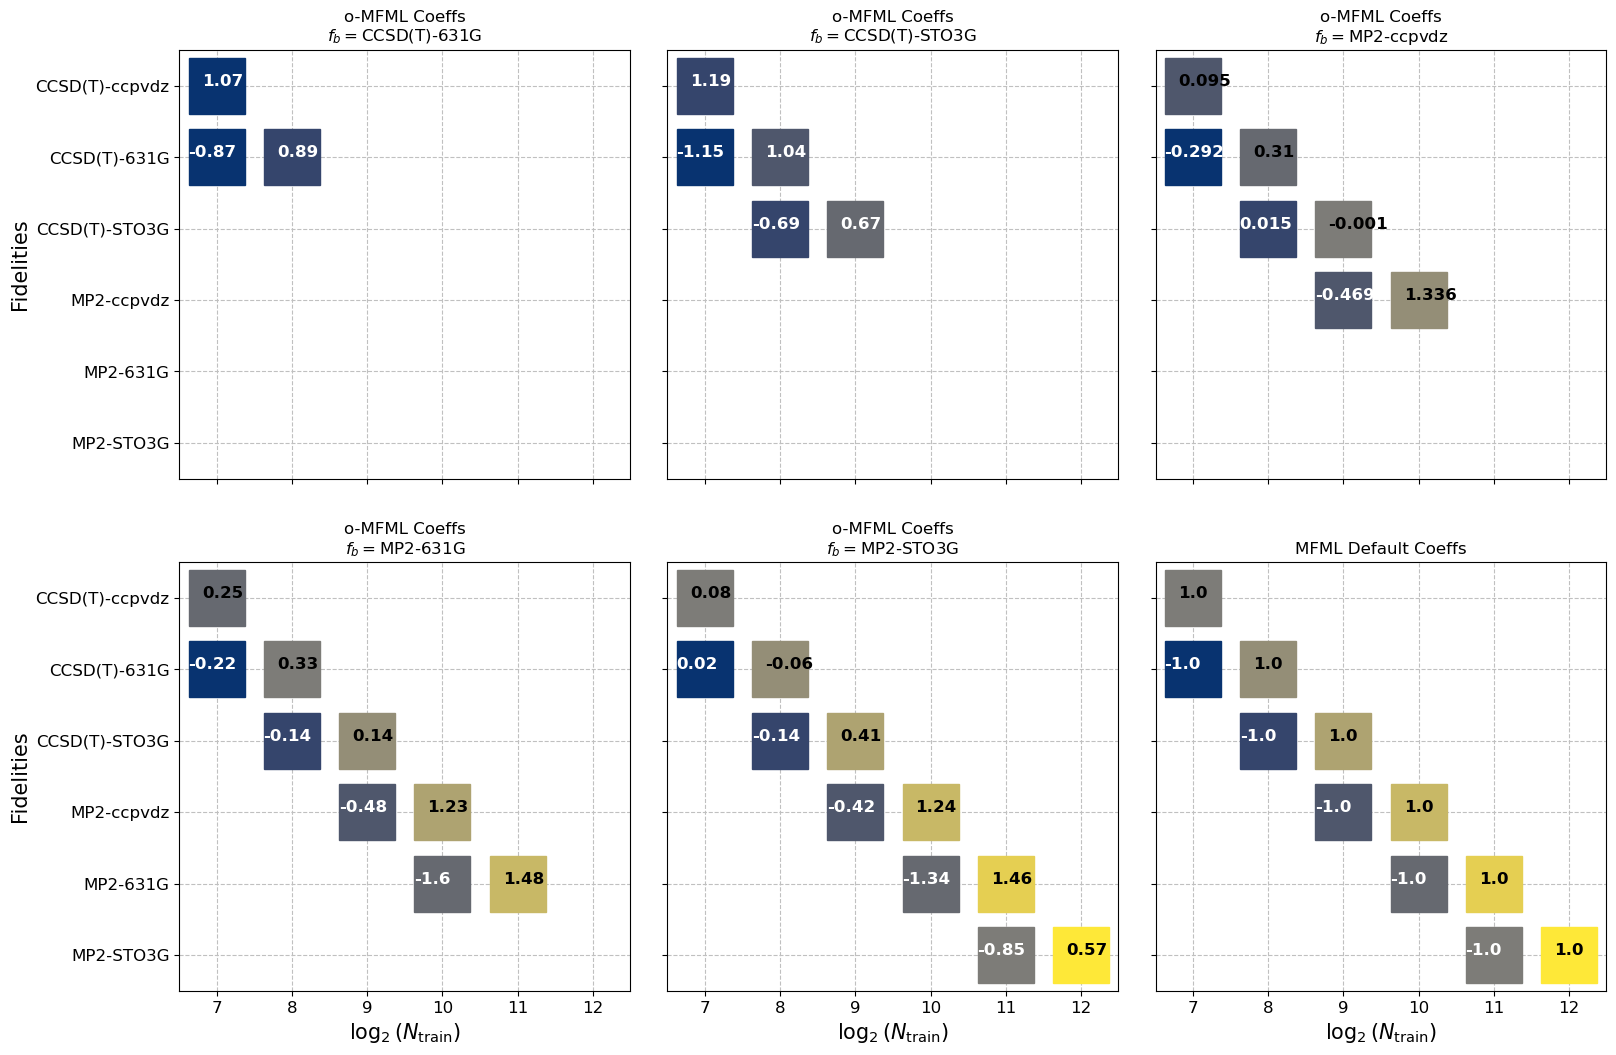

In [17]:
fig,ax = plt.subplots(2,3,figsize=(15,10),sharex=True,sharey=True)
labels = np.asarray(['MP2-STO3G','MP2-631G','MP2-ccpvdz',
                     'CCSD(T)-STO3G','CCSD(T)-631G','CCSD(T)-ccpvdz'])
temp_ = np.zeros((5),dtype=object)
for i in range(5):
    temp_[i] = np.load(f'Data/outputs/coeffOLS_{str(i)}.npy')[-1]
ax = ax.flatten('C')
ax = ax[::-1]
plt.tight_layout(h_pad=5)
for i in range(1,4):
    ax[i].set_title(f'o-MFML Coeffs\n$f_b=${labels[i-1]}')
    if i==3:
        coeff_plotter(coeff_data=temp_[i-1],labels=labels[i-1:],ax=ax[i],rounding=3)
    else:
        coeff_plotter(coeff_data=temp_[i-1],labels=labels[i-1:],ax=ax[i])
    ax[i].tick_params(axis='both', which='major', labelsize=12)

ax[-1].set_title(f'o-MFML Coeffs\n$f_b=${labels[4]}')
coeff_plotter(coeff_data=temp_[4],labels=labels[4:], uppertextcol=['w','w'],lowertextcol=['w'], ax=ax[-1],rounding=2)
ax[-1].tick_params(axis='both', which='major', labelsize=12)

ax[-2].set_title(f'o-MFML Coeffs\n$f_b=${labels[3]}')
coeff_plotter(coeff_data=temp_[3],labels=labels[3:], uppertextcol=['w','w','w'],lowertextcol=['w','w'], ax=ax[-2],rounding=2)
ax[-2].tick_params(axis='both', which='major', labelsize=12)

coeff_plotter(coeff_data=np.asarray([1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0]),labels=labels,ax=ax[0],rounding=2)
ax[0].set_title('MFML Default Coeffs')
ax[2].set_ylabel('Fidelities',fontsize=15)
ax[0].set_xlabel('',fontsize=1)
ax[0].yaxis.set_label_position("left")
ax[0].yaxis.tick_left()
ax[0].tick_params(axis='both', which='major', labelsize=12)

#ax[3].set_title('MFML Default Coeffs')
ax[-1].set_ylabel('Fidelities',fontsize=15)
ax[0].set_xlabel('$\log_2(N_{\mathrm{train}})$',fontsize=15)
ax[1].set_xlabel('$\log_2(N_{\mathrm{train}})$',fontsize=15)
ax[2].set_xlabel('$\log_2(N_{\mathrm{train}})$',fontsize=15)
ax[3].yaxis.set_label_position("left")
ax[3].yaxis.tick_left()

## DENSITY PLOT

In [12]:
def densityplots(xdown=None,xup=None,ydown=None,yup=None,ax=None,leg=False):
    colors = pyl.cm.cividis(np.linspace(0,1,5))
    offset = np.mean(train_data[0])
    sns.kdeplot(true_test-offset,label='Test Set',x=None, y=None, hue=None, weights=None, 
                palette=None, hue_order=None, hue_norm=None, color=colors[0], fill=None, 
                multiple='layer', common_norm=True, common_grid=False, cumulative=False, 
                bw_method='scott', bw_adjust=1, warn_singular=True, log_scale=None, 
                levels=10, thresh=0.05, gridsize=200, cut=3, clip=None, 
                legend=True, cbar=False, cbar_ax=None, cbar_kws=None, ax=ax)
    sns.kdeplot(defpreds-offset,label='MFML Predictions',x=None, y=None, hue=None, weights=None, 
                palette=None, hue_order=None, hue_norm=None, color=colors[1], fill=None, 
                multiple='layer', common_norm=True, common_grid=False, cumulative=False, 
                bw_method='scott', bw_adjust=1, warn_singular=True, log_scale=None, 
                levels=10, thresh=0.05, gridsize=200, cut=3, clip=None, 
                legend=True, cbar=False, cbar_ax=None, cbar_kws=None, ax=ax)
    sns.kdeplot(olspreds-offset,label='o-MFML Predictions',x=None, y=None, hue=None, weights=None, 
                palette=None, hue_order=None, hue_norm=None, color=colors[2], fill=None, 
                multiple='layer', common_norm=True, common_grid=False, cumulative=False, 
                bw_method='scott', bw_adjust=1, warn_singular=True, log_scale=None, 
                levels=10, thresh=0.05, gridsize=200, cut=3, clip=None, 
                legend=True, cbar=False, cbar_ax=None, cbar_kws=None, ax=ax)
    sns.kdeplot(train_data[0]-offset,label='Training Set',x=None, y=None, hue=None, weights=None, 
                palette=None, hue_order=None, hue_norm=None, color=colors[3], fill=None, 
                multiple='layer', common_norm=True, common_grid=False, cumulative=False, 
                bw_method='scott', bw_adjust=1, warn_singular=True, log_scale=None, 
                levels=10, thresh=0.05, gridsize=200, cut=3, clip=None, 
                legend=True, cbar=False, cbar_ax=None, cbar_kws=None, ax=ax)
    sns.kdeplot(valens-offset,label='Validation Set',x=None, y=None, hue=None, weights=None, 
                palette=None, hue_order=None, hue_norm=None, color=colors[4], fill=None, 
                multiple='layer', common_norm=True, common_grid=False, cumulative=False, 
                bw_method='scott', bw_adjust=1, warn_singular=True, log_scale=None, 
                levels=10, thresh=0.05, gridsize=200, cut=3, clip=None, 
                legend=True, cbar=False, cbar_ax=None, cbar_kws=None, ax=ax)
    ax = ax or plt.gca()
    ax.set_xlim(xdown,xup)
    ax.set_ylim(ydown,yup)
    ax.set_xlabel('Atomization Energy [kcal/mol]',fontsize=12)
    if leg:
        ax.legend()

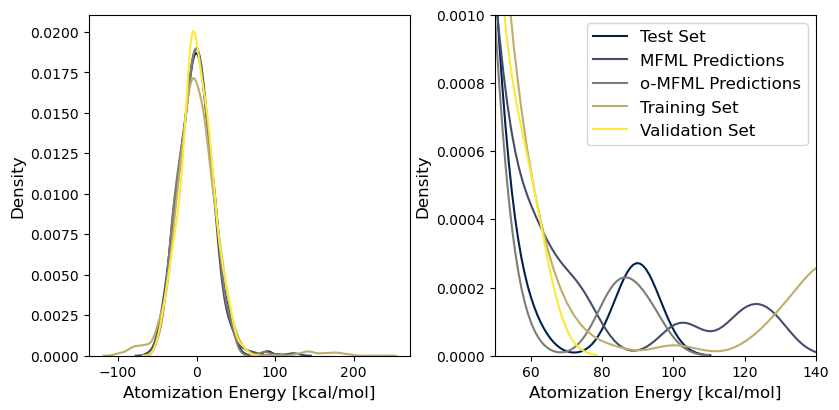

In [13]:
fig,ax = plt.subplots(1,2,figsize=(8,4))
plt.tight_layout(w_pad=3)
densityplots(ax=ax[0])
densityplots(xdown=50,xup=140,ydown=0.0,yup=0.001,ax=ax[1],leg=True)
ax[0].set_ylabel('Density', fontsize=12)
ax[1].set_ylabel('Density', fontsize=12)
ax[1].legend(fontsize=12)

## Coeff Evolution

In [18]:
def elab_coeff(ax=None):
    import matplotlib.pylab as pyl
    colors = pyl.cm.cividis(np.linspace(0,1,11))[::-1]
    col_arr = np.asarray([0,2,4,6,8,10,1,3,5,7,9])
    #colors = np.asarray(['tab:blue','tab:orange','tab:green',
                         #'tab:red','tab:purple','k',
                         #'tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan'])
    ax = ax or plt.gca()
    aa = np.arange(1,8)
    for i in range(11):
        ax.plot(aa[1:],OLScoef[1:,i],label='s='+str(i+1),marker='o',color=colors[col_arr[i]])
    ax.set_xlabel('$\log_2(N_{\mathrm{train}}^{\mathrm{CCSD(T)-ccpvdz}})$',fontsize=15)
    ax.set_ylabel(r'$\beta_{s}$',fontsize=15)
    #ax.plot([1.8,7.2],[0.3,0.3],color='silver',linestyle='--')
    #ax.plot([1.8,7.2],[-0.3,-0.3],color='silver',linestyle='--')
    ax.plot([7,7],[1.5,-1.3],color='silver',linestyle='--')
    ax.tick_params(axis='both', which='major', labelsize=12)

def coeff_subspace(ax = None):
    ax = ax or plt.gca()
    m=40
    plt.tight_layout()
    labels = np.asarray(['MP2-STO3G','MP2-631G','MP2-ccpvdz',
                         'CCSD(T)-STO3G','CCSD(T)-631G','CCSD(T)-ccpvdz'])
    import matplotlib.pylab as pyl
    colors = pyl.cm.cividis(np.linspace(0,1,11))
    #colors = np.asarray(['tab:blue','tab:orange','tab:green',
    #                     'tab:red','tab:purple','k',
    #                     'tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan'])
    
    count_arr = np.asarray([0,0,1,1,2,2,3,3,4,4,5])
    ind_arr = np.asarray([12,11,11,10,10,9,9,8,8,7,7])
    #col_arr = np.asarray([0,6,1,7,2,8,3,9,4,10,5])[::-1]
    count = 0
    for i in range(10,-1,-1):
        mm = count_arr[count]
        ax.plot([ind_arr[count]], [labels[mm]],
                marker='s',markersize=m, 
                linestyle='', #markerfacecolor='none', 
                color=colors[i])
        count += 1
    
    ax.set_ylim(-0.5,5.5)
    ax.set_xlim(6.5,12.5)
    ax.set_ylabel('Fidelities',fontsize=15)
    ax.set_xlabel('$\log_2(N_{\mathrm{train}})$',fontsize=15)
    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.grid(True, which="major", ls="--",color='silver')
    #ax.tick_params(axis='both', which='minor', labelsize=12)
    #plt.yticks(fontsize=12)
    
    #placing the coeffs as text
    col_arr = ['k','k','w','w','w','w','k','k','w','w','w']
    for i in range(6):
        ax.text(x=11.75-i,y=labels[i],s=str(np.round(OLScoef[-1][i],2)),fontsize=12,color=col_arr[i],weight='bold')
        try:
            ax.text(x=10.75-i,y=labels[i],s=str(np.round(OLScoef[-1][6+i],2)),fontsize=12,color=col_arr[6+i],weight='bold')
        except:
            pass

In [19]:
OLScoef = np.load('Data/outputs/coeffOLS_0.npy')

Text(0.5, 1.0, 'Subspace Coefficients of o-MFML \nfor $\\log_2(N_{\\mathrm{train}}^{\\mathrm{CCSD(T)-ccpvdz}})=7$')

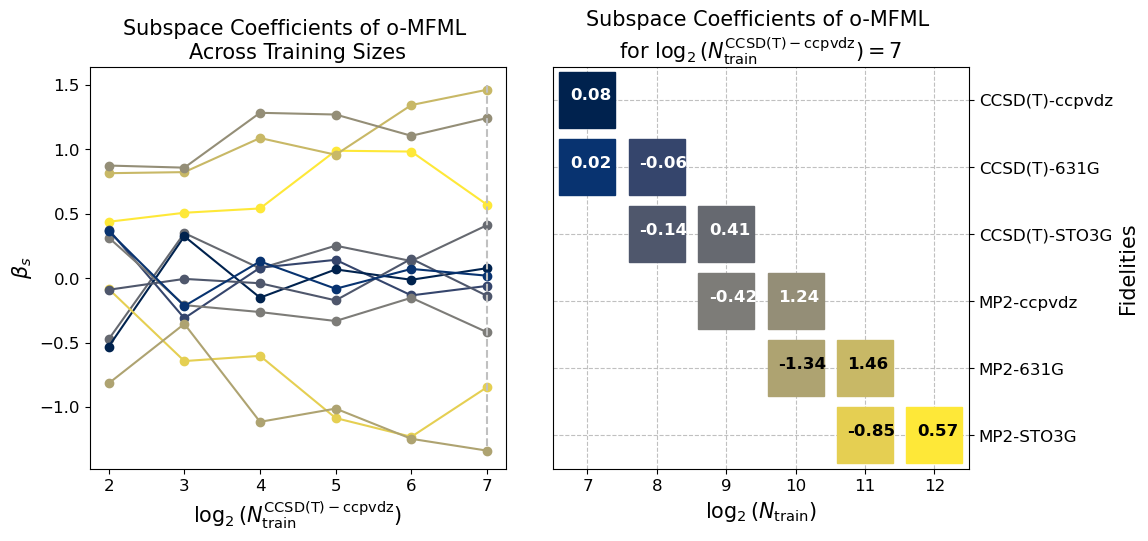

In [21]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
plt.tight_layout(w_pad=4)
#default_coeffs(ax=ax[0])
elab_coeff(ax=ax[0])
coeff_subspace(ax=ax[1])
#ax[0].set_title('Subspace Coefficients\nFor MFML',fontsize=15)
ax[0].set_title('Subspace Coefficients of o-MFML \nAcross Training Sizes',fontsize=15)
ax[1].set_title('Subspace Coefficients of o-MFML \nfor $\log_2(N_{\mathrm{train}}^{\mathrm{CCSD(T)-ccpvdz}})=7$',fontsize=15)